In [355]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [356]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #load test and train datasets.

In [357]:
len(x_train)       #number of training datasets

60000

In [358]:
len(x_test)        #number of testing datasets

10000

In [359]:
x_train[0].shape    #pixel size of each image

(28, 28)

In [360]:
x_train[0]         #2-D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [361]:
#y_train[0]

In [362]:
#y_train[:5]

In [363]:
x_train.shape

(60000, 28, 28)

In [364]:
x_train = x_train /255   #rescaling to 0-1 from 0-255 to improve accuracy of the model.
x_test = x_test /255

In [365]:
x_train_flattened = x_train.reshape(len(x_train),28*28)   #reshaping training data as 1-D array
x_train_flattened.shape

(60000, 784)

In [366]:
x_test_flattened = x_test.reshape(len(x_test),28*28)   #reshaping testing data as 1-D array
x_test_flattened.shape

(10000, 784)

In [367]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [368]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam',                            #compiling the model with arguments
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4682 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 950us/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2663 - accuracy: 0.9258


In [369]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 769us/step - loss: 0.2691 - accuracy: 0.9256


[0.26908040046691895, 0.925599992275238]

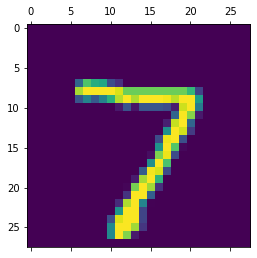

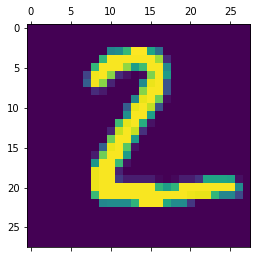

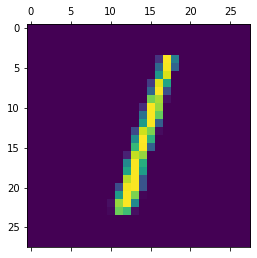

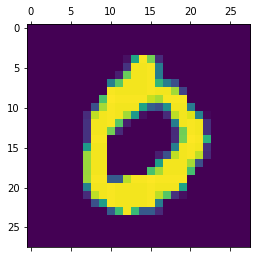

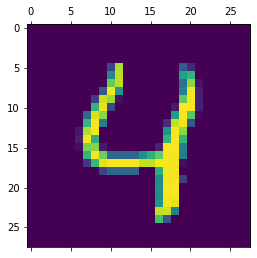

In [370]:
for i in range(5):
    plt.matshow(x_test[i])    #test digits to be predicted


In [371]:
y_predicted = model.predict(x_test_flattened)  #prediction
y_predicted[0]


array([1.30392015e-02, 3.40170857e-07, 4.42241132e-02, 9.26740885e-01,
       2.18966603e-03, 8.58516395e-02, 1.29952889e-06, 9.99677420e-01,
       8.39146376e-02, 5.58635294e-01], dtype=float32)

In [372]:
np.argmax(y_predicted[0])  #finding the exact value

7

In [373]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [378]:
model = keras.Sequential([                               #adding hidden with 100 neurons
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2783 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1265 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0870 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0537 - accuracy: 0.9837
